In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn


In [177]:
n, d, k = 1000, 2, 2



In [194]:
np.random.seed(20)
X = rand(n, d)

means = [rand(d)  for _ in range(k)]  # works for any k
#means = [rand(d) * 0.5 + 0.5, - rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))
sigmas = [S] * k    # we'll use the same Sigma for all clusters for better visual results

#print(means)
print(sigmas)
print(S.shape)

[array([[0.01278471, 0.        ],
       [0.        , 0.16223431]]), array([[0.01278471, 0.        ],
       [0.        , 0.16223431]])]
(2, 2)


Solution
===

In [215]:
def compute(x, mean, sigma):
    mat1 = (X - mean).T
    mat2 = np.linalg.inv(sigma)
    mat4 = np.dot(mat2, mat1)
    mat3 = mat1.T
    mat = np.diag(np.dot(mat3, mat4))
    numerator = np.exp(-mat/2)
    denominator = ((2*np.pi)**(d/2)*np.linalg.det(sigma))
    p = numerator/denominator
    return p

In [199]:
def clever_method(x, mn, sgm):
    '''This function takes in 2D arrays X, mean and sigma.
    It reshapes X and mean for concatenation in order to subtract mean from X
    It then uses einstein summation formula for multiplying 2x2(sigma) array by
    1000x4x2(X-mean) to obtain another 1000x4x2 array. Finally it multiplies 2
    1000x4x2 arrays together and sums over the x&y components of each data point
    and each parameter...'''
    sgm = np.array(sgm[0])
    #Convert the list of means into an array of dimensions 4x2
    mean = np.array(mn)
    #Inverse the sigma(covariant matrix)
    mat2 = np.linalg.inv(sgm)
    #reshape X and mean arrays into 3D so that they can be concatenated
    #X gets concatenated along columns from 1 column to #columns means has(number of parameters)
    #means gets concatenated along rows from 1 to number of rows in X(data poins)
    mat1 = x[:, np.newaxis, :]-mean[np.newaxis, :, :]
    #performs Einstein summation along depth axis=2
    mat3 = np.einsum('ijk,km', mat1, mat2)
    #Multiplies 2 matrices element wise basically performs
    #(x-m)T(sigma^{-1}(x-m)) for each element
    mat4 = np.multiply(mat1, mat3)
    #Sum elements along depth for xTx purpose
    mat5 = np.sum(mat4, axis=2)
    #Just plugging in the formula from now on
    numerator = np.exp(-mat5/2)
    denominator = ((2*np.pi)**(d/2)*np.linalg.det(S))
    p = numerator/denominator
    answer = list(p.T)
    return answer

In [213]:
def not_so_clever_method(x, mn, sgm):
    '''Another method of mine which uses for loop for M and S but not X'''
    log_ps = [compute(x, m, s) for m, s in zip(mn, list(sgm))]  # exercise: try to do this without looping
    return log_ps

In [ ]:
def somebody_suggested(x, mn, sgm):
    '''Somebody suggested this on the forum'''
    p = list(map(lambda p: compute(x, *p), zip(mn, sgm)))
    return p

In [217]:
'''Timing different methods'''
methods = [clever_method, not_so_clever_method, somebody_suggested]
timers = []
for f in methods:
    r = %timeit -o f(X, means, sigmas)
    timers.append(r)

288 µs ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.69 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.65 ms ± 49 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [220]:
log_ps = clever_method(X, means, sigmas)

In [221]:
#Assigns each point to one of the parameters
assignments = np.argmax(log_ps, axis=0)
print(len(assignments))

1000


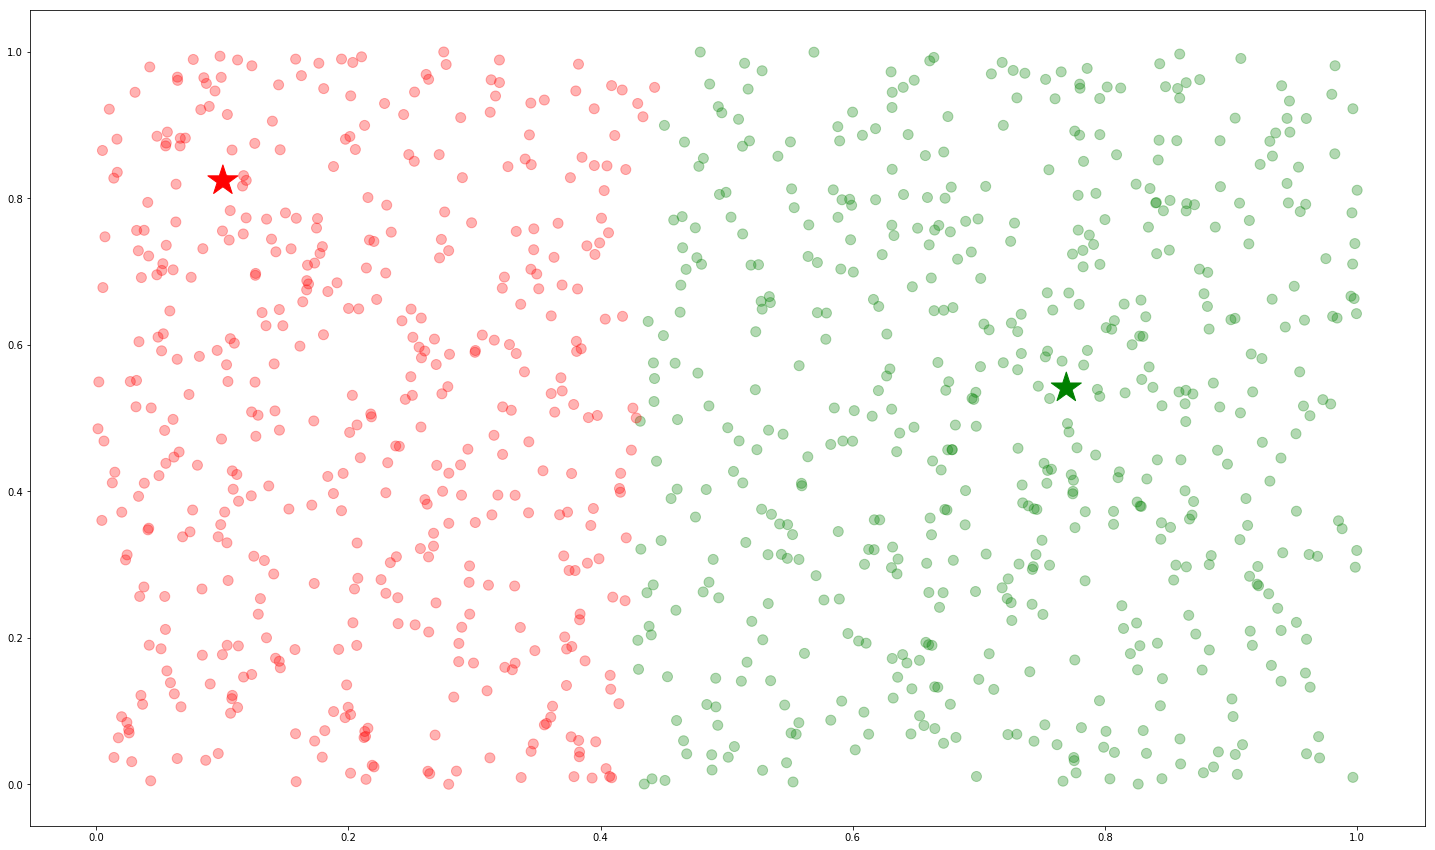

In [225]:
list_of_colors = ['red', 'green',
         #         'blue',
       #            'black',
      #            'c'
                  ]

fig = plt.figure(figsize=[25, 15])
ax = fig.add_subplot(111)


colors = np.array(list_of_colors)[assignments]
ax.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.3)
ax.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=1000, c=list_of_colors)

plt.show()